In [ ]:
import time
import codecs
import string


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import gensim
from wordcloud import WordCloud
import textract
import pyLDAvis
import pyLDAvis.gensim_models
import textstat

from IPython.core.display import Image
%matplotlib inline

In [212]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\jO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [213]:
import nltk

# First Try with one Article

In [333]:
from goose3 import Goose
url1 = 'https://www.derstandard.at/story/2000114029959/corona-virus-zuerst-nur-wuhan-jetzt-die-ganze-welt'
g = Goose()
article1 = g.extract(url=url1)
article1 = article1.cleaned_text[:]

In [329]:
article1.title

'Coronavirus: Zuerst nur Wuhan, jetzt die ganze Welt'

In [330]:
article1.meta_description

'Weil über die Verbreitung des Virus noch nicht alles bekannt ist, hat die WHO den Notstand ausgerufen. Mehrere Verdachtsfälle beschäftigen Österreich'

In [335]:
print(article1)

Weil über die Verbreitung des Virus noch nicht alles bekannt ist, hat die WHO den Notstand ausgerufen. Mehrere Verdachtsfälle beschäftigen Österreich

Wahrscheinlich hat das Gespräch, das der WHO-Generaldirektor Tedros Adhanom Ghebreyesus am Donnerstagabend mit dem chinesischen Staatschef Xi Jinping führte, den Ausschlag für die Ausrufung einer "gesundheitlichen Notlage internationaler Tragweite" gegeben. "Public Health Emergency of International Concern" (PHEIC) ist der Fachbegriff für eine Situation, die mit einer erhöhten Alarmstufe zu vergleichen ist. Die Gesundheitsbehörden sollen sich wappnen, offen kommunizieren und Daten teilen. Tedros Adhanom Ghebreyesus rief aber auch die Menschen auf, nicht in Panik zu geraten. Auch in den USA wurde am Freitag der Gesundheitsnotstand ausgerufen. Notlage klingt ernst, doch was den Umgang mit dem neuen, unbekannten Wuhan-Virus betrifft, läuft eigentlich alles nach Plan.

Sie entscheiden darüber, wie Sie unsere Inhalte nutzen wollen. Ihr Gerät 

In [224]:
stop_de = nltk.corpus.stopwords.words('german')

In [299]:
stop_de.extend(['-','', '”'])
stop_de.extend(['sie entscheiden darüber, wie sie unsere inhalte nutzen wollen.','ihr gerät erlaubt uns derzeit leider nicht, die entsprechenden optionen anzuzeigen.', "bitte deaktivieren sie sämtliche hard- und software-komponenten, die in der lage sind teile unserer website zu blockieren. z.b. browser-addons wie adblocker oder auch netzwerktechnische filter.", "sie haben ein pur-abo?"])

In [413]:
list_words = article.replace("Sie entscheiden darüber, wie Sie unsere Inhalte nutzen wollen. Ihr Gerät erlaubt uns derzeit leider nicht, die entsprechenden Optionen anzuzeigen.", "")
list_words = article.replace("Bitte deaktivieren Sie sämtliche Hard- und Software-Komponenten, die in der Lage sind Teile unserer Website zu blockieren. Z.B. Browser-AddOns wie Adblocker oder auch netzwerktechnische Filter.", "")
list_words = article.replace("Sie haben ein PUR-Abo?", "")
list_words = article1.split()
list_words = [l.strip().lower() for l in list_words]
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stop_de]
list_words[0:20]

['verbreitung',
 'virus',
 'bekannt',
 'who',
 'notstand',
 'ausgerufen',
 'mehrere',
 'verdachtsfälle',
 'beschäftigen',
 'österreich',
 'wahrscheinlich',
 'gespräch',
 'who-generaldirektor',
 'tedros',
 'adhanom',
 'ghebreyesus',
 'donnerstagabend',
 'chinesischen',
 'staatschef',
 'xi']

In [414]:
freqdist = Counter(list_words)

In [415]:
freqdist.most_common(20)

[('ausgerufen', 2),
 ('tedros', 2),
 ('adhanom', 2),
 ('ghebreyesus', 2),
 ('notlage', 2),
 ('verbreitung', 1),
 ('virus', 1),
 ('bekannt', 1),
 ('who', 1),
 ('notstand', 1),
 ('mehrere', 1),
 ('verdachtsfälle', 1),
 ('beschäftigen', 1),
 ('österreich', 1),
 ('wahrscheinlich', 1),
 ('gespräch', 1),
 ('who-generaldirektor', 1),
 ('donnerstagabend', 1),
 ('chinesischen', 1),
 ('staatschef', 1)]

# creating a word cloud

In [416]:
from wordcloud import WordCloud

In [417]:
cleaned = ' '.join(list_words)
wordcloud = WordCloud(background_color="white").generate(cleaned)

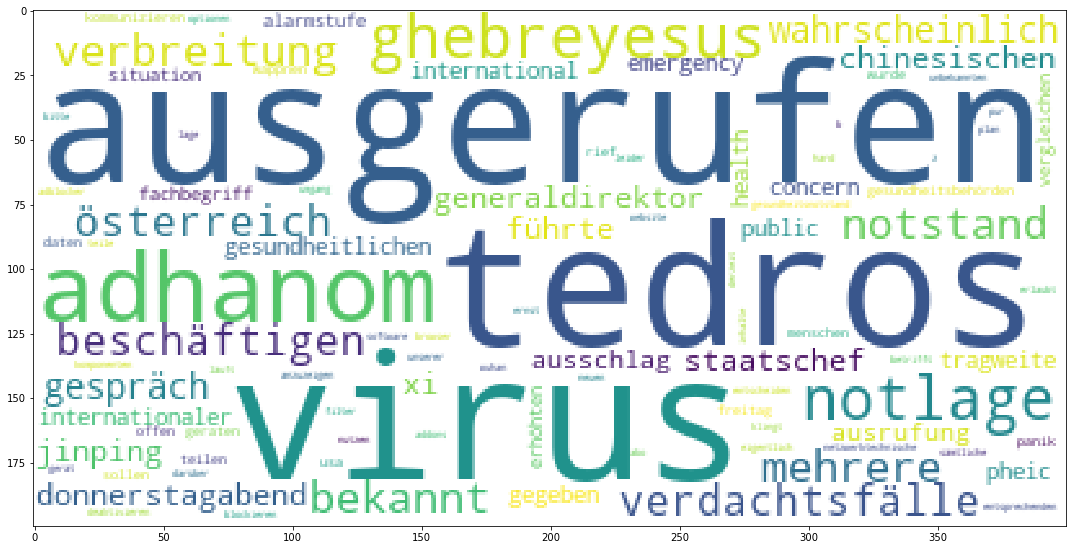

In [418]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

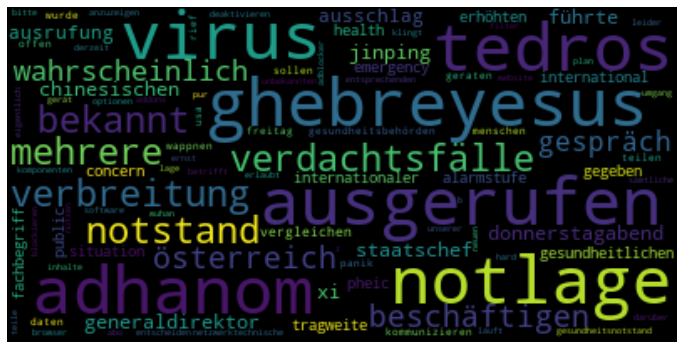

In [419]:
wordcloud = WordCloud(max_font_size=40).generate(cleaned)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [421]:
from nltk.tokenize import word_tokenize
word_tokenize(article1)

['Weil',
 'über',
 'die',
 'Verbreitung',
 'des',
 'Virus',
 'noch',
 'nicht',
 'alles',
 'bekannt',
 'ist',
 ',',
 'hat',
 'die',
 'WHO',
 'den',
 'Notstand',
 'ausgerufen',
 '.',
 'Mehrere',
 'Verdachtsfälle',
 'beschäftigen',
 'Österreich',
 'Wahrscheinlich',
 'hat',
 'das',
 'Gespräch',
 ',',
 'das',
 'der',
 'WHO-Generaldirektor',
 'Tedros',
 'Adhanom',
 'Ghebreyesus',
 'am',
 'Donnerstagabend',
 'mit',
 'dem',
 'chinesischen',
 'Staatschef',
 'Xi',
 'Jinping',
 'führte',
 ',',
 'den',
 'Ausschlag',
 'für',
 'die',
 'Ausrufung',
 'einer',
 '``',
 'gesundheitlichen',
 'Notlage',
 'internationaler',
 'Tragweite',
 "''",
 'gegeben',
 '.',
 '``',
 'Public',
 'Health',
 'Emergency',
 'of',
 'International',
 'Concern',
 "''",
 '(',
 'PHEIC',
 ')',
 'ist',
 'der',
 'Fachbegriff',
 'für',
 'eine',
 'Situation',
 ',',
 'die',
 'mit',
 'einer',
 'erhöhten',
 'Alarmstufe',
 'zu',
 'vergleichen',
 'ist',
 '.',
 'Die',
 'Gesundheitsbehörden',
 'sollen',
 'sich',
 'wappnen',
 ',',
 'offen',
 '

In [422]:
stop = set(nltk.corpus.stopwords.words('german'))

# Word Clouds of Keywords in Each Topic

In [423]:
def preprocess_article(df):
    corpus = []
    stem = nltk.stem.PorterStemmer()
    lem = nltk.stem.WordNetLemmatizer()
    words=[w for w in nltk.tokenize.word_tokenize(article1) if (w not in stop)]
    words=[lem.lemmatize(w) for w in words if len(w)>2]
    corpus.append(words)
    return corpus

corpus = preprocess_article(article1)

In [424]:
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(96 unique tokens: ['Adblocker', 'Adhanom', 'Alarmstufe', 'Auch', 'Ausrufung']...) from 1 documents (total 104 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(96 unique tokens: ['Adblocker', 'Adhanom', 'Alarmstufe', 'Auch', 'Ausrufung']...) from 1 documents (total 104 corpus positions)", 'datetime': '2022-02-04T10:00:06.930603', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [425]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 4, id2word = dic, passes = 10, workers = 2,  per_word_topics=True)
lda_model.show_topics()

using symmetric alpha at 0.25
using symmetric eta at 0.25
using serial LDA version on this node
running online LDA training, 4 topics, 10 passes over the supplied corpus of 1 documents, updating every 4000 documents, evaluating every ~1 documents, iterating 50x with a convergence threshold of 0.001000
training LDA model using 2 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #0 (0.250): 0.028*"Sie" + 0.017*"Adhanom" + 0.016*"ausgerufen" + 0.016*"Notlage" + 0.016*"Tedros" + 0.015*"Ghebreyesus" + 0.011*"chinesischen" + 0.011*"führte" + 0.011*"Menschen" + 0.011*"Panik"
topic #1 (0.250): 0.020*"Sie" + 0.015*"Tedros" + 0.014*"ausgerufen" + 0.014*"Notlage" + 0.013*"Ghebreyesus" + 0.012*"Adhanom" + 0.011*"deaktivieren" + 0.011*"Bitte" + 0.011*"netzwerktechnische" + 0.011*"Inhalte"
topic #2 (0.250): 0.023*"Sie" + 0.014*"ausgerufen" + 0.014*"Tedros" + 0.014*"Ghebreyesus" + 0.013*"Notlage" + 0.013*"Adhanom" + 0.011*"Wahrscheinlich" + 0.011*"

[(0,
  '0.033*"Sie" + 0.018*"Tedros" + 0.018*"ausgerufen" + 0.018*"Adhanom" + 0.018*"Notlage" + 0.017*"Ghebreyesus" + 0.010*"führte" + 0.010*"chinesischen" + 0.010*"Menschen" + 0.010*"Wuhan-Virus"'),
 (1,
  '0.011*"Sie" + 0.011*"Tedros" + 0.011*"ausgerufen" + 0.011*"Notlage" + 0.011*"Ghebreyesus" + 0.011*"Adhanom" + 0.010*"deaktivieren" + 0.010*"Bitte" + 0.010*"netzwerktechnische" + 0.010*"Inhalte"'),
 (2,
  '0.011*"Sie" + 0.011*"ausgerufen" + 0.011*"Tedros" + 0.011*"Ghebreyesus" + 0.011*"Notlage" + 0.011*"Adhanom" + 0.010*"Wahrscheinlich" + 0.010*"Teile" + 0.010*"Tragweite" + 0.010*"Wuhan-Virus"'),
 (3,
  '0.014*"Sie" + 0.012*"Ghebreyesus" + 0.012*"Adhanom" + 0.012*"Notlage" + 0.012*"ausgerufen" + 0.011*"Tedros" + 0.011*"Gesundheitsbehörden" + 0.011*"internationaler" + 0.011*"sämtliche" + 0.011*"wurde"')]

In [428]:
def format_topics_sentences(ldamodel, corpus, article1):

    sent_topics_df = pd.DataFrame()


    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            

        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: 
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), 
                                                                  round(prop_topic,4), 
                                                                  topic_keywords]), 
                                                       ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']


    contents = pd.Series(article1)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(lda_model, bow_corpus, article1)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.9928,"Sie, Tedros, ausgerufen, Adhanom, Notlage, Ghe...",Weil über die Verbreitung des Virus noch nicht...


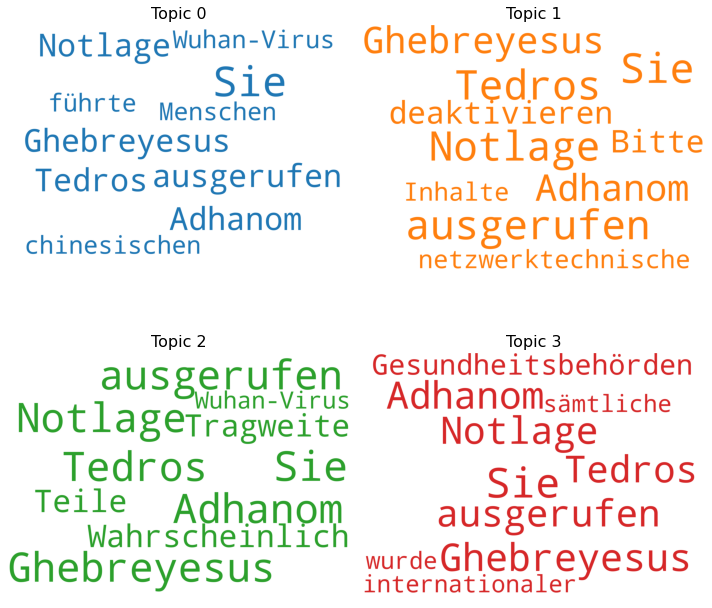

In [429]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Working with a bigger corpus

In [ ]:
url = https://www.derstandard.at/story/2000114029959/corona-virus-zuerst-nur-wuhan-jetzt-die-ganze-welt
url = https://www.derstandard.at/story/2000114321230/coronavirus-erste-auslaendische-todesopfer-in-china
url = https://www.derstandard.at/story/2000117792769/die-maske-wird-wieder-zurueckgedraengt
url = https://www.derstandard.at/story/2000122048367/neue-daten-covid-und-die-geruchsstoerung
url = https://www.derstandard.at/story/2000122044594/zweite-welle-laut-anschober-mit-voller-wucht-da-aber-harter
url = https://www.derstandard.at/story/2000122038540/zweite-welle-bringt-hohe-uebersterblichkeit-in-oesterreich
url = https://www.derstandard.at/story/2000131120039/zusperren-in-etappen-der-weg-zum-bundesweiten-lockdown
url = https://www.derstandard.at/search?n=&fd=2020-05-20&td=2020-06-30&s=score&query=lockdown
url = https://www.derstandard.at/story/2000125520241/wien-niederoesterreich-und-das-burgenland-starten-in-die-osterruhe
url = https://www.derstandard.at/story/2000127308246/optimismus-in-oesterreich-wieder-auf-dem-niveau-wie-vor-erstem
url = https://www.derstandard.at/story/2000118287806/corona-stuerzt-weltwirtschaft-in-tiefere-rezession-als-bisher-gedacht
url = https://www.derstandard.at/story/2000132889581/oesterreich-verzeichnet-mit-43-053-neuinfektionen-naechsten-hoechststand                                            

In [376]:
url_list1 = ['https://www.derstandard.at/story/2000114029959/corona-virus-zuerst-nur-wuhan-jetzt-die-ganze-welt',
'https://www.derstandard.at/story/2000114321230/coronavirus-erste-auslaendische-todesopfer-in-china',
'https://www.derstandard.at/story/2000117792769/die-maske-wird-wieder-zurueckgedraengt',
'https://www.derstandard.at/story/2000122048367/neue-daten-covid-und-die-geruchsstoerung',
'https://www.derstandard.at/story/2000122044594/zweite-welle-laut-anschober-mit-voller-wucht-da-aber-harter',
'https://www.derstandard.at/story/2000122038540/zweite-welle-bringt-hohe-uebersterblichkeit-in-oesterreich',
'https://www.derstandard.at/story/2000131120039/zusperren-in-etappen-der-weg-zum-bundesweiten-lockdown',
'https://www.derstandard.at/search?n=&fd=2020-05-20&td=2020-06-30&s=score&query=lockdown',
'https://www.derstandard.at/story/2000125520241/wien-niederoesterreich-und-das-burgenland-starten-in-die-osterruhe',
'https://www.derstandard.at/story/2000127308246/optimismus-in-oesterreich-wieder-auf-dem-niveau-wie-vor-erstem',
'https://www.derstandard.at/story/2000118287806/corona-stuerzt-weltwirtschaft-in-tiefere-rezession-als-bisher-gedacht', 'https://www.derstandard.at/story/2000132889581/oesterreich-verzeichnet-mit-43-053-neuinfektionen-naechsten-hoechststand']

In [387]:
all_articles = ''
def articles_f():
    g = Goose()
    global all_articles
    for url in url_list1:
        article = g.extract(url=url)
        article = article.cleaned_text[:]
        article = article.replace("Sie entscheiden darüber, wie Sie unsere Inhalte nutzen wollen. Ihr Gerät erlaubt uns derzeit leider nicht, die entsprechenden Optionen anzuzeigen.", "")
        article = article.replace("Bitte deaktivieren Sie sämtliche Hard- und Software-Komponenten, die in der Lage sind Teile unserer Website zu blockieren. Z.B. Browser-AddOns wie Adblocker oder auch netzwerktechnische Filter.", "")
        article = article.replace("Sie haben ein PUR-Abo?", "")
        all_articles += '\n'+ article
        print(all_articles)

In [388]:
articles_f()


Weil über die Verbreitung des Virus noch nicht alles bekannt ist, hat die WHO den Notstand ausgerufen. Mehrere Verdachtsfälle beschäftigen Österreich

Wahrscheinlich hat das Gespräch, das der WHO-Generaldirektor Tedros Adhanom Ghebreyesus am Donnerstagabend mit dem chinesischen Staatschef Xi Jinping führte, den Ausschlag für die Ausrufung einer "gesundheitlichen Notlage internationaler Tragweite" gegeben. "Public Health Emergency of International Concern" (PHEIC) ist der Fachbegriff für eine Situation, die mit einer erhöhten Alarmstufe zu vergleichen ist. Die Gesundheitsbehörden sollen sich wappnen, offen kommunizieren und Daten teilen. Tedros Adhanom Ghebreyesus rief aber auch die Menschen auf, nicht in Panik zu geraten. Auch in den USA wurde am Freitag der Gesundheitsnotstand ausgerufen. Notlage klingt ernst, doch was den Umgang mit dem neuen, unbekannten Wuhan-Virus betrifft, läuft eigentlich alles nach Plan.







Weil über die Verbreitung des Virus noch nicht alles bekannt ist, 


Weil über die Verbreitung des Virus noch nicht alles bekannt ist, hat die WHO den Notstand ausgerufen. Mehrere Verdachtsfälle beschäftigen Österreich

Wahrscheinlich hat das Gespräch, das der WHO-Generaldirektor Tedros Adhanom Ghebreyesus am Donnerstagabend mit dem chinesischen Staatschef Xi Jinping führte, den Ausschlag für die Ausrufung einer "gesundheitlichen Notlage internationaler Tragweite" gegeben. "Public Health Emergency of International Concern" (PHEIC) ist der Fachbegriff für eine Situation, die mit einer erhöhten Alarmstufe zu vergleichen ist. Die Gesundheitsbehörden sollen sich wappnen, offen kommunizieren und Daten teilen. Tedros Adhanom Ghebreyesus rief aber auch die Menschen auf, nicht in Panik zu geraten. Auch in den USA wurde am Freitag der Gesundheitsnotstand ausgerufen. Notlage klingt ernst, doch was den Umgang mit dem neuen, unbekannten Wuhan-Virus betrifft, läuft eigentlich alles nach Plan.






Zwei Patienten aus den USA und Japan sind in Wuhan gestorben. Es gi


Weil über die Verbreitung des Virus noch nicht alles bekannt ist, hat die WHO den Notstand ausgerufen. Mehrere Verdachtsfälle beschäftigen Österreich

Wahrscheinlich hat das Gespräch, das der WHO-Generaldirektor Tedros Adhanom Ghebreyesus am Donnerstagabend mit dem chinesischen Staatschef Xi Jinping führte, den Ausschlag für die Ausrufung einer "gesundheitlichen Notlage internationaler Tragweite" gegeben. "Public Health Emergency of International Concern" (PHEIC) ist der Fachbegriff für eine Situation, die mit einer erhöhten Alarmstufe zu vergleichen ist. Die Gesundheitsbehörden sollen sich wappnen, offen kommunizieren und Daten teilen. Tedros Adhanom Ghebreyesus rief aber auch die Menschen auf, nicht in Panik zu geraten. Auch in den USA wurde am Freitag der Gesundheitsnotstand ausgerufen. Notlage klingt ernst, doch was den Umgang mit dem neuen, unbekannten Wuhan-Virus betrifft, läuft eigentlich alles nach Plan.






Zwei Patienten aus den USA und Japan sind in Wuhan gestorben. Es gi


Weil über die Verbreitung des Virus noch nicht alles bekannt ist, hat die WHO den Notstand ausgerufen. Mehrere Verdachtsfälle beschäftigen Österreich

Wahrscheinlich hat das Gespräch, das der WHO-Generaldirektor Tedros Adhanom Ghebreyesus am Donnerstagabend mit dem chinesischen Staatschef Xi Jinping führte, den Ausschlag für die Ausrufung einer "gesundheitlichen Notlage internationaler Tragweite" gegeben. "Public Health Emergency of International Concern" (PHEIC) ist der Fachbegriff für eine Situation, die mit einer erhöhten Alarmstufe zu vergleichen ist. Die Gesundheitsbehörden sollen sich wappnen, offen kommunizieren und Daten teilen. Tedros Adhanom Ghebreyesus rief aber auch die Menschen auf, nicht in Panik zu geraten. Auch in den USA wurde am Freitag der Gesundheitsnotstand ausgerufen. Notlage klingt ernst, doch was den Umgang mit dem neuen, unbekannten Wuhan-Virus betrifft, läuft eigentlich alles nach Plan.






Zwei Patienten aus den USA und Japan sind in Wuhan gestorben. Es gi


Weil über die Verbreitung des Virus noch nicht alles bekannt ist, hat die WHO den Notstand ausgerufen. Mehrere Verdachtsfälle beschäftigen Österreich

Wahrscheinlich hat das Gespräch, das der WHO-Generaldirektor Tedros Adhanom Ghebreyesus am Donnerstagabend mit dem chinesischen Staatschef Xi Jinping führte, den Ausschlag für die Ausrufung einer "gesundheitlichen Notlage internationaler Tragweite" gegeben. "Public Health Emergency of International Concern" (PHEIC) ist der Fachbegriff für eine Situation, die mit einer erhöhten Alarmstufe zu vergleichen ist. Die Gesundheitsbehörden sollen sich wappnen, offen kommunizieren und Daten teilen. Tedros Adhanom Ghebreyesus rief aber auch die Menschen auf, nicht in Panik zu geraten. Auch in den USA wurde am Freitag der Gesundheitsnotstand ausgerufen. Notlage klingt ernst, doch was den Umgang mit dem neuen, unbekannten Wuhan-Virus betrifft, läuft eigentlich alles nach Plan.






Zwei Patienten aus den USA und Japan sind in Wuhan gestorben. Es gi

In [389]:
def cleaning_articles():
    global cleaned_articles
    cleaned_articles = all_articles.lower()
    cleaned_articles = re.sub(' +',' ', cleaned_articles)
    cleaned_articles = re.sub(r'\n\s*\n', '\n', cleaned_articles)
    print(cleaned_articles)

In [390]:
cleaning_articles()


weil über die verbreitung des virus noch nicht alles bekannt ist, hat die who den notstand ausgerufen. mehrere verdachtsfälle beschäftigen österreich
wahrscheinlich hat das gespräch, das der who-generaldirektor tedros adhanom ghebreyesus am donnerstagabend mit dem chinesischen staatschef xi jinping führte, den ausschlag für die ausrufung einer "gesundheitlichen notlage internationaler tragweite" gegeben. "public health emergency of international concern" (pheic) ist der fachbegriff für eine situation, die mit einer erhöhten alarmstufe zu vergleichen ist. die gesundheitsbehörden sollen sich wappnen, offen kommunizieren und daten teilen. tedros adhanom ghebreyesus rief aber auch die menschen auf, nicht in panik zu geraten. auch in den usa wurde am freitag der gesundheitsnotstand ausgerufen. notlage klingt ernst, doch was den umgang mit dem neuen, unbekannten wuhan-virus betrifft, läuft eigentlich alles nach plan.
zwei patienten aus den usa und japan sind in wuhan gestorben. es gibt wied

In [431]:
stop_de = nltk.corpus.stopwords.words('german')
stop_de.extend(['-','', '”'])
list_words = cleaned_articles.split()
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stop_de]
print(list_words)

['verbreitung', 'virus', 'bekannt', 'who', 'notstand', 'ausgerufen', 'mehrere', 'verdachtsfälle', 'beschäftigen', 'österreich', 'wahrscheinlich', 'gespräch', 'who-generaldirektor', 'tedros', 'adhanom', 'ghebreyesus', 'donnerstagabend', 'chinesischen', 'staatschef', 'xi', 'jinping', 'führte', 'ausschlag', 'ausrufung', 'gesundheitlichen', 'notlage', 'internationaler', 'tragweite', 'gegeben', 'public', 'health', 'emergency', 'of', 'international', 'concern', 'pheic', 'fachbegriff', 'situation', 'erhöhten', 'alarmstufe', 'vergleichen', 'gesundheitsbehörden', 'sollen', 'wappnen', 'offen', 'kommunizieren', 'daten', 'teilen', 'tedros', 'adhanom', 'ghebreyesus', 'rief', 'menschen', 'panik', 'geraten', 'usa', 'wurde', 'freitag', 'gesundheitsnotstand', 'ausgerufen', 'notlage', 'klingt', 'ernst', 'umgang', 'neuen', 'unbekannten', 'wuhan-virus', 'betrifft', 'läuft', 'eigentlich', 'plan', 'zwei', 'patienten', 'usa', 'japan', 'wuhan', 'gestorben', 'gibt', 'mehr', 'neue', 'infektionen', 'vergleich', 

In [432]:
freqdist = Counter(list_words)
freqdist.most_common(20)

[('österreich', 9),
 ('lockdown', 7),
 ('–', 6),
 ('wien', 6),
 ('freitag', 5),
 ('zwei', 5),
 ('seit', 5),
 ('wurden', 5),
 ('virus', 4),
 ('mehr', 4),
 ('15', 4),
 ('fälle', 4),
 ('offen', 3),
 ('neuen', 3),
 ('besonders', 3),
 ('ab', 3),
 ('övp', 3),
 ('wochen', 3),
 ('lage', 3),
 ('todesfälle', 3)]

In [433]:
cleaned = ' '.join(list_words)
wordcloud = WordCloud(background_color="white").generate(cleaned)

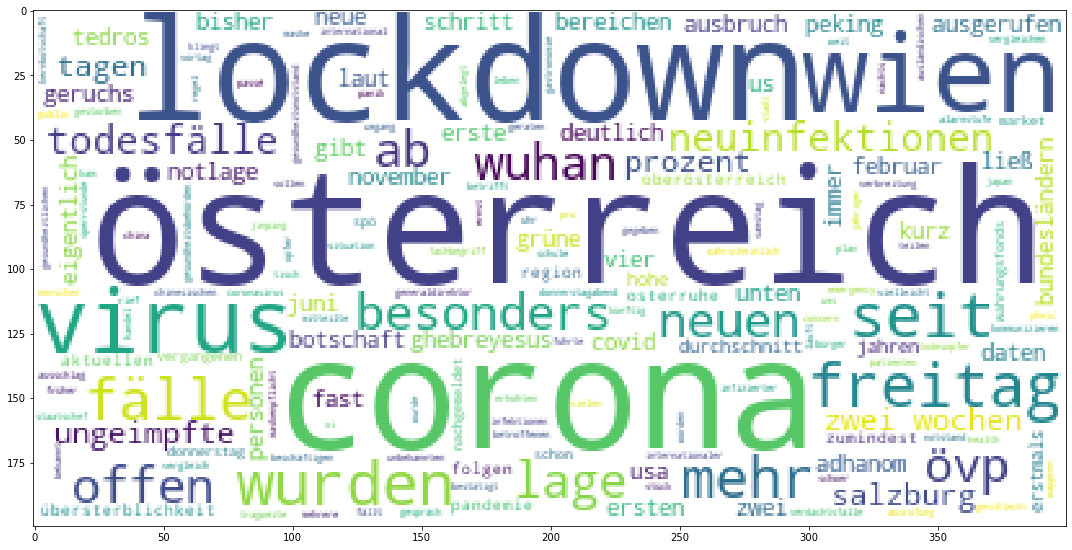

In [434]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

In [436]:
from nltk.tokenize import word_tokenize
word_tokenize(cleaned_articles)

['weil',
 'über',
 'die',
 'verbreitung',
 'des',
 'virus',
 'noch',
 'nicht',
 'alles',
 'bekannt',
 'ist',
 ',',
 'hat',
 'die',
 'who',
 'den',
 'notstand',
 'ausgerufen',
 '.',
 'mehrere',
 'verdachtsfälle',
 'beschäftigen',
 'österreich',
 'wahrscheinlich',
 'hat',
 'das',
 'gespräch',
 ',',
 'das',
 'der',
 'who-generaldirektor',
 'tedros',
 'adhanom',
 'ghebreyesus',
 'am',
 'donnerstagabend',
 'mit',
 'dem',
 'chinesischen',
 'staatschef',
 'xi',
 'jinping',
 'führte',
 ',',
 'den',
 'ausschlag',
 'für',
 'die',
 'ausrufung',
 'einer',
 '``',
 'gesundheitlichen',
 'notlage',
 'internationaler',
 'tragweite',
 "''",
 'gegeben',
 '.',
 '``',
 'public',
 'health',
 'emergency',
 'of',
 'international',
 'concern',
 "''",
 '(',
 'pheic',
 ')',
 'ist',
 'der',
 'fachbegriff',
 'für',
 'eine',
 'situation',
 ',',
 'die',
 'mit',
 'einer',
 'erhöhten',
 'alarmstufe',
 'zu',
 'vergleichen',
 'ist',
 '.',
 'die',
 'gesundheitsbehörden',
 'sollen',
 'sich',
 'wappnen',
 ',',
 'offen',
 '

In [437]:
def preprocess_article(df):
    corpus = []
    stem = nltk.stem.PorterStemmer()
    lem = nltk.stem.WordNetLemmatizer()
    words=[w for w in nltk.tokenize.word_tokenize(cleaned_articles) if (w not in stop)]
    words=[lem.lemmatize(w) for w in words if len(w)>2]
    corpus.append(words)
    return corpus

corpus = preprocess_article(cleaned_articles)

In [438]:
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(454 unique tokens: ['10.000', '10.000er-marke', '15.', '2.286', '2000.']...) from 1 documents (total 574 corpus positions)
Dictionary lifecycle event {'msg': "built Dictionary(454 unique tokens: ['10.000', '10.000er-marke', '15.', '2.286', '2000.']...) from 1 documents (total 574 corpus positions)", 'datetime': '2022-02-04T10:11:33.894626', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [443]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 4, id2word = dic, passes = 10, workers = 2,  per_word_topics=True)
lda_model.show_topics()

using symmetric alpha at 0.25
using symmetric eta at 0.25
using serial LDA version on this node
running online LDA training, 4 topics, 10 passes over the supplied corpus of 1 documents, updating every 4000 documents, evaluating every ~1 documents, iterating 50x with a convergence threshold of 0.001000
training LDA model using 2 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #0 (0.250): 0.007*"lockdown" + 0.005*"österreich" + 0.005*"freitag" + 0.005*"wien" + 0.005*"seit" + 0.004*"wurden" + 0.004*"15." + 0.004*"zwei" + 0.004*"mehr" + 0.004*"virus"
topic #1 (0.250): 0.009*"österreich" + 0.007*"lockdown" + 0.007*"wien" + 0.006*"seit" + 0.006*"freitag" + 0.005*"zwei" + 0.005*"wurden" + 0.004*"virus" + 0.004*"fälle" + 0.004*"todesfälle"
topic #2 (0.250): 0.013*"österreich" + 0.008*"lockdown" + 0.008*"wien" + 0.007*"zwei" + 0.007*"wurden" + 0.006*"freitag" + 0.006*"fälle" + 0.006*"seit" + 0.005*"mehr" + 0.005*"15."
topic #3 (0.250): 0.01

topic #1 (0.250): 0.002*"österreich" + 0.002*"lockdown" + 0.002*"wien" + 0.002*"seit" + 0.002*"freitag" + 0.002*"zwei" + 0.002*"wurden" + 0.002*"virus" + 0.002*"fälle" + 0.002*"todesfälle"
topic #2 (0.250): 0.013*"österreich" + 0.011*"lockdown" + 0.009*"wien" + 0.008*"zwei" + 0.008*"freitag" + 0.008*"wurden" + 0.008*"seit" + 0.006*"fälle" + 0.006*"15." + 0.006*"mehr"
topic #3 (0.250): 0.002*"österreich" + 0.002*"lockdown" + 0.002*"seit" + 0.002*"wien" + 0.002*"wurden" + 0.002*"zwei" + 0.002*"freitag" + 0.002*"virus" + 0.002*"mehr" + 0.002*"15."
topic diff=0.010024, rho=0.316220
-6.873 per-word bound, 117.2 perplexity estimate based on a held-out corpus of 1 documents with 574 words
LdaMulticore lifecycle event {'msg': 'trained LdaModel(num_terms=454, num_topics=4, decay=0.5, chunksize=2000) in 0.95s', 'datetime': '2022-02-04T10:13:21.094176', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'even

[(0,
  '0.002*"lockdown" + 0.002*"österreich" + 0.002*"freitag" + 0.002*"wien" + 0.002*"seit" + 0.002*"wurden" + 0.002*"15." + 0.002*"zwei" + 0.002*"mehr" + 0.002*"virus"'),
 (1,
  '0.002*"österreich" + 0.002*"lockdown" + 0.002*"wien" + 0.002*"seit" + 0.002*"freitag" + 0.002*"zwei" + 0.002*"wurden" + 0.002*"virus" + 0.002*"fälle" + 0.002*"todesfälle"'),
 (2,
  '0.013*"österreich" + 0.011*"lockdown" + 0.009*"wien" + 0.008*"zwei" + 0.008*"freitag" + 0.008*"wurden" + 0.008*"seit" + 0.006*"fälle" + 0.006*"15." + 0.006*"mehr"'),
 (3,
  '0.002*"österreich" + 0.002*"lockdown" + 0.002*"seit" + 0.002*"wien" + 0.002*"wurden" + 0.002*"zwei" + 0.002*"freitag" + 0.002*"virus" + 0.002*"mehr" + 0.002*"15."')]

In [447]:
def format_topics_sentences(ldamodel, corpus, cleaned_articles):

    sent_topics_df = pd.DataFrame()


    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            

        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: 
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), 
                                                                  round(prop_topic,4), 
                                                                  topic_keywords]), 
                                                       ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']


    contents = pd.Series(cleaned_articles)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(lda_model, bow_corpus, cleaned_articles)


df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

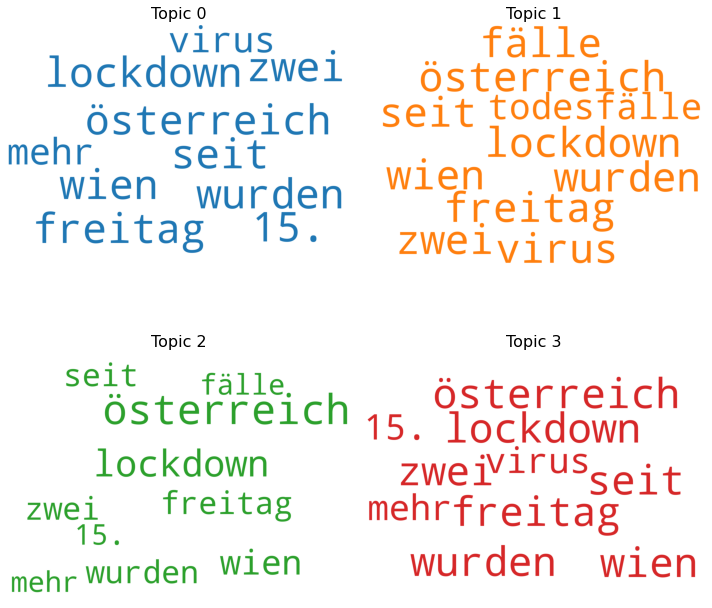

In [446]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()